In [1]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=2000,n_features=2,centers=4,random_state=0)
from sklearn.model_selection import train_test_split

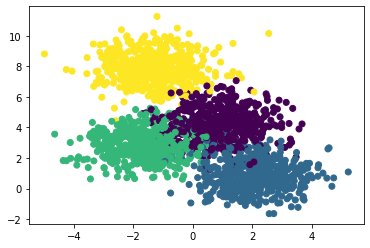

In [2]:
pl.scatter(X[:,0],X[:,1],c=y)

In [3]:
y=np.mod(y,2)

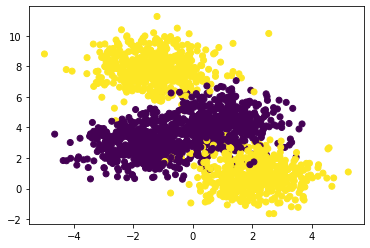

In [4]:
pl.scatter(X[:,0],X[:,1],c=y)
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

In [5]:
class Multi_N:
    def __init__(self,layers):
        self.input_layers,self.hidden_layers,self.output_layers=layers
        print(layers)
        self.weights1=np.random.rand(self.hidden_layers,self.input_layers)
        self.bias1=np.random.rand(self.hidden_layers).reshape(-1,1)

        self.weights2=np.random.rand(self.output_layers,self.hidden_layers)
        self.bias2=np.random.rand(self.output_layers).reshape(-1,1)
        
    def Forward_pass(self,X,W,b):
        z=np.dot(X,W.T)+b.T
        return z.astype(np.float32)
    
    def Sigmoid(self,z):
        sig=1.0/(1.0+np.exp(-z))
        return sig
    
    def loss(self,y,y_hat):
        return 0.5*mean_squared_error(y,y_hat)
        
    def Forward(self,X):
        self.A1=self.Forward_pass(X,self.weights1,self.bias1)
        self.H1=self.Sigmoid(self.A1)
        
        self.A2=self.Forward_pass(self.H1,self.weights2,self.bias2)
        self.H2=self.Sigmoid(self.A2)
#         print(self.A1.shape,self.H1.shape,self.A2.shape,self.H2.shape)
        return self.H2
    
    def Backward(self,X,y):
        y=y.reshape(-1,1) if (y.ndim==1) else y
        y_pred=self.Forward(X)
        
#       Derivatives from output to hidden
        self.DA2=(((y_pred-y)*y_pred*(1-y_pred)))
        self.DW2=self.DA2.T.dot(self.H1)
        self.DB2=self.DA2.sum(axis=0).reshape(-1,1)
#       Derivatives from hidden to input 
        self.DA1=self.DA2*(self.weights2)*self.H1*(1-self.H1) 
        self.DW1=(self.DA1).sum(axis=0).reshape(-1,1)*self.weights1
        self.DB1=(self.DA1).sum(axis=0).reshape(-1,1)
        return y_pred

    def fit(self,X,y,epochs,lr):
        y=y.reshape(-1,1) if (y.ndim==1) else y
        mse_errors=[]
        n=X.shape[0]
        for i in range(epochs):
            y_hat=self.Backward(X,y)
            mse=self.loss(y,y_hat)
            mse_errors.append(mse)
            self.weights2=self.weights2-lr*(self.DW2/n)
            self.bias2=self.bias2-lr*(self.DB2/n)
            self.weights1=self.weights1-lr*(self.DW1/n)
            self.bias1=self.bias1-lr*(self.DB1/n)
        return mse_errors

    def predict(self,X):
        y_pr=self.Forward(X)
        return(y_pr>0.5).astype(int).ravel()
        
    



[2, 10, 1]


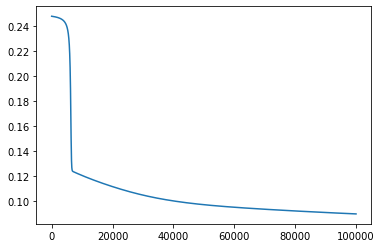

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=0)
multi=Multi_N([2,10,1])
errors=multi.fit(X_train,y_train,epochs=100000,lr=0.01)
pl.plot(errors)

In [7]:
y_train_pred=multi.predict(X_train)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7486666666666667

In [9]:
y_test_pred=multi.predict(X_test)
accuracy_score(y_test_pred,y_test)

0.722